In [1]:
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk import download
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
import pandas as pd
from collections import Counter
import os


In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Iulia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Iulia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Iulia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Iulia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
nltk.data.path.append("C:/Users/Iulia/AppData/Roaming/nltk_data")

In [3]:
spell = SpellChecker()

In [5]:
data_path = "../data/HI/translated-documents"
annotations_path = '../data/HI/subtask-2-annotations.txt'


### Storing the file names with their topic

In [6]:
topic_mapping = {}

with open(annotations_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split('\t')
        file_name, topic_info = parts[0], parts[1]
        
        # Remove the file extension if present
        file_name = file_name.replace('.txt', '')
        
        if 'CC' in topic_info:
            topic_mapping[file_name] = 'CC'
        elif 'URW' in topic_info:
            topic_mapping[file_name] = 'URW'

print(topic_mapping)


{'HI_122': 'URW', 'HI_94': 'URW', 'HI_104': 'URW', 'HI_112': 'URW', 'HI_41': 'URW', 'HI_2': 'URW', 'HI_92': 'URW', 'HI_130': 'CC', 'HI_15': 'URW', 'HI_116': 'URW', 'HI_45': 'URW', 'HI_129': 'CC', 'HI_53': 'URW', 'HI_150': 'CC', 'HI_120': 'URW', 'HI_33': 'URW', 'HI_82': 'URW', 'HI_29': 'URW', 'HI_102': 'URW', 'HI_47': 'URW', 'HI_145': 'CC', 'HI_21': 'URW', 'HI_127': 'URW', 'HI_98': 'URW', 'HI_20': 'URW', 'HI_63': 'URW', 'HI_72': 'URW', 'HI_144': 'CC', 'HI_7': 'URW', 'HI_57': 'URW', 'HI_80': 'URW', 'HI_66': 'URW', 'HI_117': 'URW', 'HI_108': 'URW', 'HI_23': 'URW', 'HI_49': 'URW', 'HI_138': 'CC', 'HI_61': 'URW', 'HI_91': 'URW', 'HI_142': 'CC', 'HI_74': 'URW', 'HI_123': 'URW', 'HI_55': 'URW', 'HI_149': 'CC', 'HI_136': 'CC', 'HI_25': 'URW', 'HI_106': 'URW', 'HI_69': 'URW', 'HI_85': 'URW', 'HI_18': 'URW', 'HI_121': 'URW', 'HI_1': 'URW', 'HI_44': 'URW', 'HI_113': 'URW', 'HI_36': 'URW', 'HI_79': 'URW', 'HI_32': 'URW', 'HI_103': 'URW', 'HI_70': 'URW', 'HI_133': 'CC', 'HI_146': 'CC', 'HI_89': 'UR

### Having the content also stored along with the file names (which include also the topic)

In [7]:
from pathlib import Path

# Dict for storing the file names with their content
documents = {}

# Loop through each file
for filepath in Path(data_path).glob('HI_*.txt'):
    # Extract the filename without the txt extension
    filename = filepath.stem
    
    # Extract the number from the filename
    try:
        _, number = filename.split('_')
    except ValueError:
        print(f"Skipping file with another format: {filename}")
        continue
    
    # Get the topic from the mapping dictionary
    topic = topic_mapping.get(filename, "Unknown")
    
    # Create the new filename with topic included
    new_filename = f"HI_{topic}_{number}.txt"
    
    with filepath.open('r', encoding='utf-8') as file:
        documents[new_filename] = file.read()

print(list(documents.keys()))  


['HI_URW_1.txt', 'HI_Unknown_100.txt', 'HI_Unknown_101.txt', 'HI_URW_102.txt', 'HI_URW_103.txt', 'HI_URW_104.txt', 'HI_Unknown_105.txt', 'HI_URW_106.txt', 'HI_URW_108.txt', 'HI_URW_109.txt', 'HI_URW_111.txt', 'HI_URW_112.txt', 'HI_URW_113.txt', 'HI_URW_115.txt', 'HI_URW_116.txt', 'HI_URW_117.txt', 'HI_URW_118.txt', 'HI_Unknown_119.txt', 'HI_URW_120.txt', 'HI_URW_121.txt', 'HI_URW_122.txt', 'HI_URW_123.txt', 'HI_URW_124.txt', 'HI_URW_127.txt', 'HI_URW_128.txt', 'HI_CC_129.txt', 'HI_URW_13.txt', 'HI_CC_130.txt', 'HI_Unknown_131.txt', 'HI_Unknown_132.txt', 'HI_CC_133.txt', 'HI_CC_136.txt', 'HI_CC_137.txt', 'HI_CC_138.txt', 'HI_Unknown_14.txt', 'HI_CC_141.txt', 'HI_CC_142.txt', 'HI_CC_144.txt', 'HI_CC_145.txt', 'HI_CC_146.txt', 'HI_Unknown_147.txt', 'HI_Unknown_148.txt', 'HI_CC_149.txt', 'HI_URW_15.txt', 'HI_CC_150.txt', 'HI_Unknown_16.txt', 'HI_URW_18.txt', 'HI_URW_2.txt', 'HI_URW_20.txt', 'HI_URW_21.txt', 'HI_URW_22.txt', 'HI_URW_23.txt', 'HI_URW_24.txt', 'HI_URW_25.txt', 'HI_Unknown_27.

### Look at text segmentation, stemming and lemmatization

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Add more stopwords
custom_stop_words = {"also", "said", "due", "one", "would", "could", "us"}  
stop_words.update(custom_stop_words) 

def preprocess_text(text):
    # Clean unwanted characters, keep basic punctuation
    text = re.sub(r'[^\w\s.,!?]', '', text)
    
    # Sentence Segmentation
    sentences = sent_tokenize(text)
    
    # Tokenization, Stemming, and Lemmatization
    processed_sentences = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        
        for word in words:
            lemma = lemmatizer.lemmatize(word)
            stem = stemmer.stem(word)
            
            # Check if the word is not a stopword and is not punctuation
            if word.lower() not in stop_words and word.isalpha():
                processed_sentences.append([word, lemma, stem])
    
    return processed_sentences

data = []
word_counts_by_topic = {topic: Counter() for topic in ['CC', 'URW', 'Unknown']}

for filename, text in documents.items():
    preprocessed_text = preprocess_text(text)
    
    # Get topic from filename
    topic = filename.split('_')[1] if '_' in filename else 'Unknown'
    
    for token_info in preprocessed_text:
        data.append([filename] + token_info)
        word_counts_by_topic[topic].update([token_info[0].lower()])  

df = pd.DataFrame(data, columns=['filename', 'token', 'lemma', 'stem'])


In [18]:
df.head()

,filename,token,lemma,stem
0,HI_URW_1.txt,Prime,Prime,prime
1,HI_URW_1.txt,Minister,Minister,minist
2,HI_URW_1.txt,Narendra,Narendra,narendra
3,HI_URW_1.txt,Modi,Modi,modi
4,HI_URW_1.txt,Russian,Russian,russian


### Look at most common words

In [10]:
# Show the most common words for each topic
for topic, counter in word_counts_by_topic.items():
    most_common = counter.most_common(15)  
    print(f"\nMost common words for topic '{topic}':")
    for word, count in most_common:
        print(f"{word}: {count}")


Most common words for topic 'CC':
climate: 71
change: 58
carbon: 56
heat: 31
emissions: 28
year: 26
plants: 24
people: 23
water: 22
global: 21
many: 21
greenhouse: 18
gas: 17
years: 17
world: 16

Most common words for topic 'URW':
russia: 782
ukraine: 666
war: 433
countries: 322
russian: 302
putin: 265
india: 243
president: 206
weapons: 168
modi: 158
ukrainian: 145
nato: 145
army: 138
nuclear: 130
attack: 130

Most common words for topic 'Unknown':
russia: 93
india: 82
countries: 56
peace: 53
ukraine: 53
minister: 45
modi: 45
war: 44
prisoners: 41
russian: 38
prime: 31
security: 30
people: 30
exchange: 30
ukrainian: 29


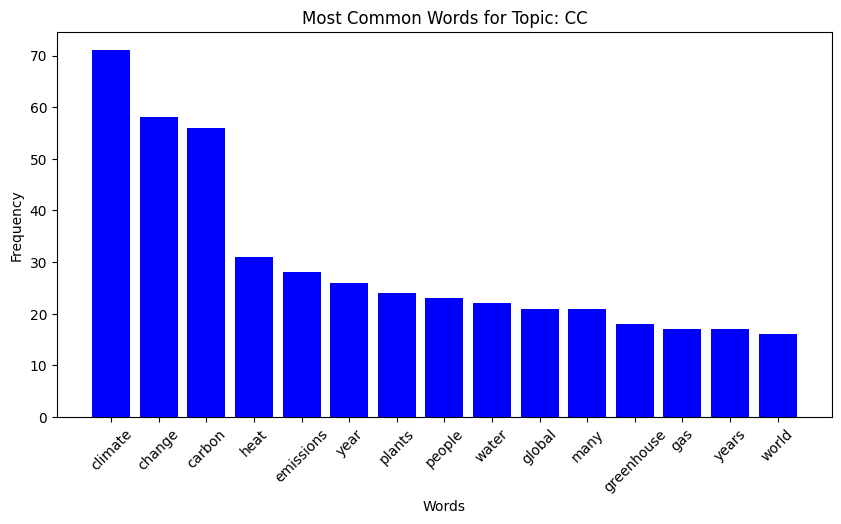

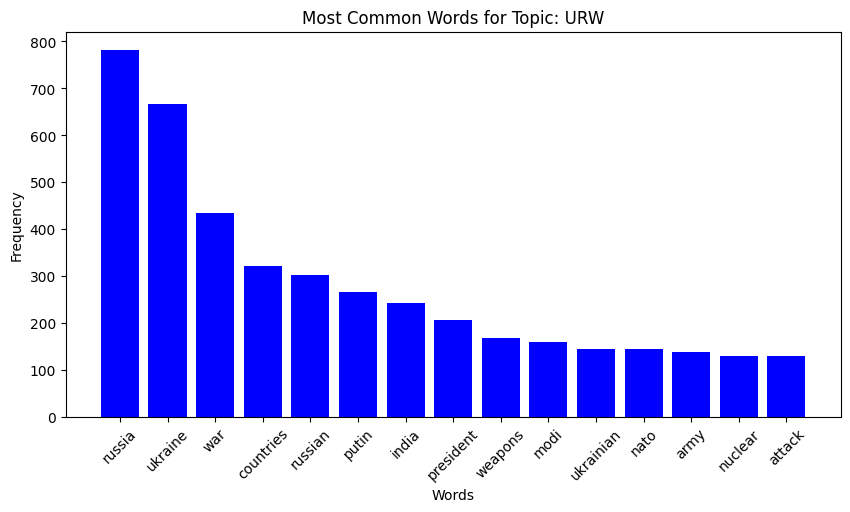

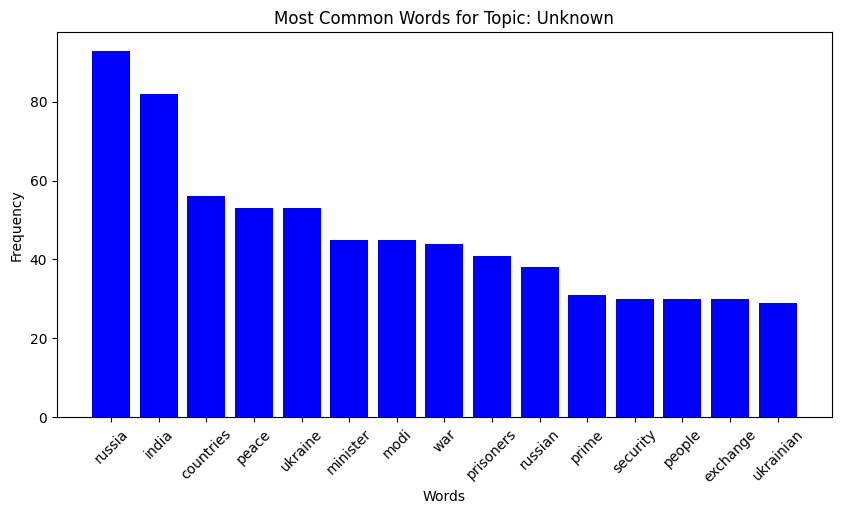

In [ ]:
import matplotlib.pyplot as plt

def plot_word_frequencies(word_counts, topic):
    words, counts = zip(*word_counts.most_common(15))
    
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='blue')
    plt.title(f'Most Common Words for Topic: {topic}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

for topic in word_counts_by_topic.keys():
    plot_word_frequencies(word_counts_by_topic[topic], topic)


### Couting docs for each topic

In [12]:
def count_topics(topic):
    count = sum(1 for key in documents.keys() if topic in key)
    return count

In [13]:
print(f"Number of keys containing 'unknown': {count_topics("Unknown")}")
print(f"Number of keys containing 'URW': {count_topics("URW")}")
print(f"Number of keys containing 'CC': {count_topics("CC")}")



Number of keys containing 'unknown': 24
Number of keys containing 'URW': 78
Number of keys containing 'CC': 13


### Look at the texts with Unknown topic

In [14]:
for key in documents.keys():
    if "Unknown" in key:
        print(key, ": ", documents[key])

HI_Unknown_100.txt :  Any summit for peace in Ukraine should include Russia ... New Delhi: India on Friday made it clear that any international peace conference on Ukraine should not be one-sided and should also include Russia. Addressing the media in Kyiv after the bilateral summit between Prime Minister Narendra Modi and Ukrainian President Vladimir Zelensky, External Affairs Minister S Jaishankar said, &quot;We have been involved in many meetings of the summit starting from Copenhagen.&quot; He said that it included the views of not only those involving India but many others as well. I think many other countries have also participated in these meetings and they have their own special views on how to take it forward. Jaishankar said that what we heard from the Ukrainian side can be understood as to how to take it forward and what their expectations are. He said, &quot;Our view is that any exercise, if it is to be productive, will naturally have to involve the other party concerned (i

### Compare the lenghts of the text files

C:\Users\Iulia\AppData\Local\Temp\ipykernel_23140\1699155808.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(text_lengths.values(), labels=text_lengths.keys())


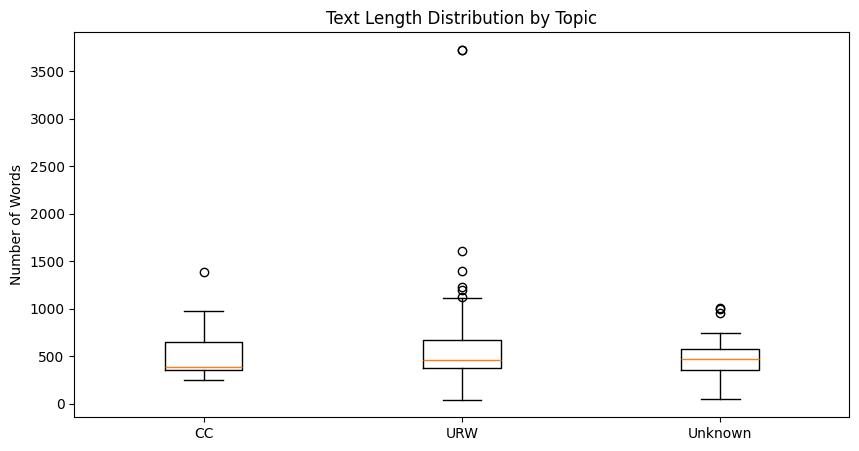

{'CC': [364, 977, 244, 1383, 911, 299, 648, 574, 409, 391, 351, 362, 299], 'URW': [403, 321, 306, 451, 376, 559, 241, 330, 516, 687, 452, 799, 3723, 477, 461, 1126, 449, 1391, 1602, 256, 497, 312, 41, 351, 596, 567, 442, 455, 836, 782, 1199, 464, 314, 202, 684, 341, 569, 506, 215, 370, 403, 454, 459, 380, 332, 558, 451, 525, 1223, 402, 186, 628, 217, 244, 436, 686, 469, 454, 3723, 571, 330, 1108, 1038, 449, 389, 1054, 443, 461, 702, 831, 416, 441, 327, 799, 521, 1007, 478, 402], 'Unknown': [739, 243, 416, 541, 619, 359, 474, 291, 299, 388, 991, 449, 478, 951, 1005, 547, 332, 302, 555, 458, 739, 548, 52, 451]}


In [15]:
# Have a dict to store lengths of texts for each topic
text_lengths = {'CC': [], 'URW': [], 'Unknown': []}

# Calculate the lengths of the documents
for filename, content in documents.items():
    # Extract topic from the filename
    parts = filename.split('_')
    if len(parts) > 1:
        topic = parts[1]  
    else:
        topic = 'Unknown'  
    
    # Get the length of the content by the number of words
    text_length = len(content.split())  
    
    # Append the length to the topic list
    if topic in text_lengths:
        text_lengths[topic].append(text_length)

plt.figure(figsize=(10, 5))
plt.boxplot(text_lengths.values(), labels=text_lengths.keys())
plt.title('Text Length Distribution by Topic')
plt.ylabel('Number of Words')
plt.show()

print(text_lengths)


### Creating word clouds

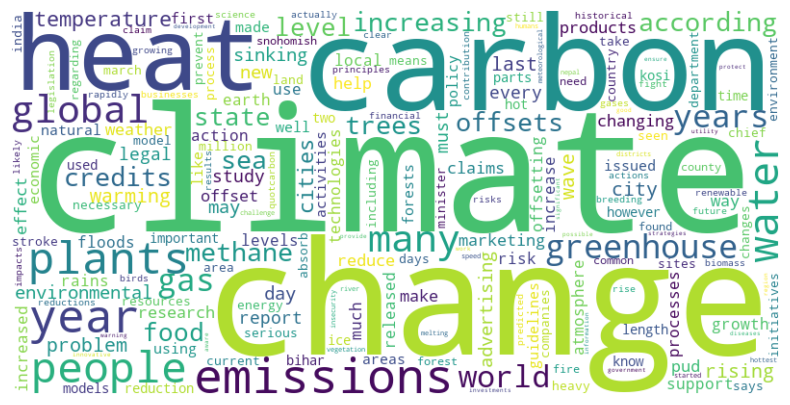

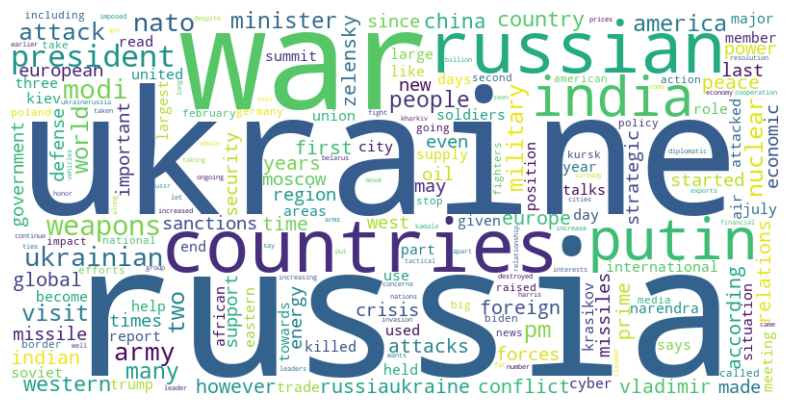

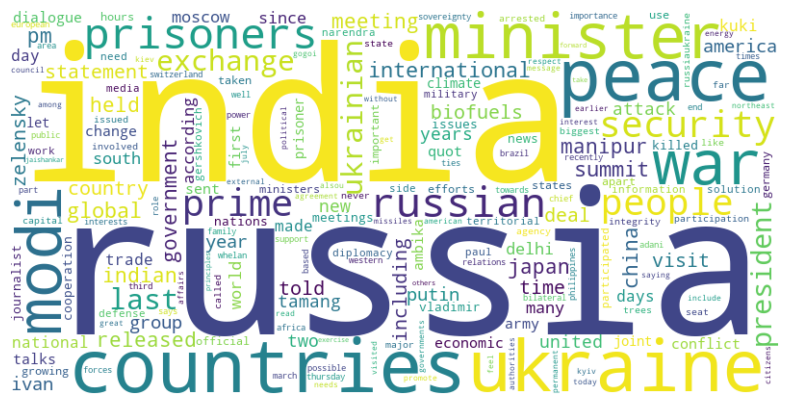

In [26]:
from wordcloud import WordCloud

def generate_wordcloud(word_counts):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

for topic in word_counts_by_topic.keys():
    generate_wordcloud(word_counts_by_topic[topic])
